# Modules

Esta tabla contiene la información a nivel de fichero (módulo).  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'module__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('modules')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-14 18:03:32.584532 Data cache files found ...
2024-05-14 18:03:32.588567 Data cache files successfully loaded!!
The dataset contains 7124 (39.09%) instances for BEGINNER class and 11102 (60.91%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions_pct', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances of {TARGET_CLASS}. Each of the instances corresponds to a file. For each file we have {X.shape[1]} attributes.')

 EXPERT CLASS Features shape: (11102, 13)
As we can see the downloaded data contains a total of 11102 instances of EXPERT. Each of the instances corresponds to a file. For each file we have 13 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11102 entries, 191 to 18225
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              11102 non-null  object 
 1   module__has_doc_string               11102 non-null  bool   
 2   module__global_stmts_pct             11102 non-null  float64
 3   module__global_expressions_pct       11102 non-null  float64
 4   module__number_of_classes            11102 non-null  int64  
 5   module__number_of_functions          11102 non-null  int64  
 6   module__class_defs_pct               11102 non-null  float64
 7   module__function_defs_pct            11102 non-null  float64
 8   module__enum_defs_pct                11102 non-null  float64
 9   module__average_stmts_function_body  11102 non-null  float64
 10  module__average_stmts_method_body    11102 non-null  float64
 11  module__type_annotations_pct   

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y una de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [28.77%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions_pct         0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
dtype: int64

In [6]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions_pct
------------------------------
0 instancias no tienen un valor para la columna module__global_expressions_pct


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__fu

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,11102,6,SnakeCase,7204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,11102,2,False,7946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,11102.0,NaN,NaN,NaN,0.166453,0.213175,0.0,0.0,0.095238,0.25,1.0
module__global_expressions_pct,11102.0,NaN,NaN,NaN,0.081048,0.16914,0.0,0.0,0.0,0.090909,1.0
module__number_of_classes,11102.0,NaN,NaN,NaN,1.091785,3.024708,0.0,0.0,1.0,1.0,113.0
module__number_of_functions,11102.0,NaN,NaN,NaN,2.234282,6.059873,0.0,0.0,0.0,2.0,258.0
module__class_defs_pct,11102.0,NaN,NaN,NaN,0.394912,0.451161,0.0,0.0,0.022543,1.0,1.0
module__function_defs_pct,11102.0,NaN,NaN,NaN,0.400872,0.45385,0.0,0.0,0.0,1.0,1.0
module__enum_defs_pct,11102.0,NaN,NaN,NaN,0.006144,0.057754,0.0,0.0,0.0,0.0,1.0
module__average_stmts_function_body,11102.0,NaN,NaN,NaN,2.52465,4.069847,0.0,0.0,0.0,4.0,53.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.0
    "module__number_of_classes": [(0, 0), (1, 1), (1,inf)],  # min: 0 max: 113
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 258
    "module__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__average_stmts_function_body": [(0.0, 0.0), (0.0, inf)], #min: 0.0 max: 53.0
    "module__average_stmts_method_body": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 114.0
    "module__global_expressions_pct": [(0,0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__global_stmts_pct": [(0, 0), (0.0, inf)] # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions_pct'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))
print(get_statistics(X_copy, ['module__has_doc_string'], 10))
print(get_statistics(X_copy, ['module__has_entry_point'], 10))
print(get_statistics(X_copy, ['module__name_convention'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]   5546   49.954963
             [1.0_1.0]   3529   31.787065
             [0.0_1.0)   2027   18.257972

module__function_defs_pct  count  percentage
                [0.0_0.0]   5826   52.477031
                [1.0_1.0]   3309   29.805440
                [0.0_1.0)   1967   17.717528

module__enum_defs_pct  count  percentage
            [0.0_0.0]  10913   98.297604
            [0.0_inf]    189    1.702396

module__number_of_classes  count  percentage
                    [0_0]   5546   49.954963
                    [1_1]   3525   31.751036
                  [1_inf]   2031   18.294001

module__number_of_functions  count  percentage
                      [0_0]   5826   52.477031
                    [0_inf]   5276   47.522969

module__type_annotations_pct  count  percentage
                   [0.0_0.0]   6515    58.68312
                   [0.0_inf]   4587    41.31688

module__average_stmts_function_body

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (11102, 18)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

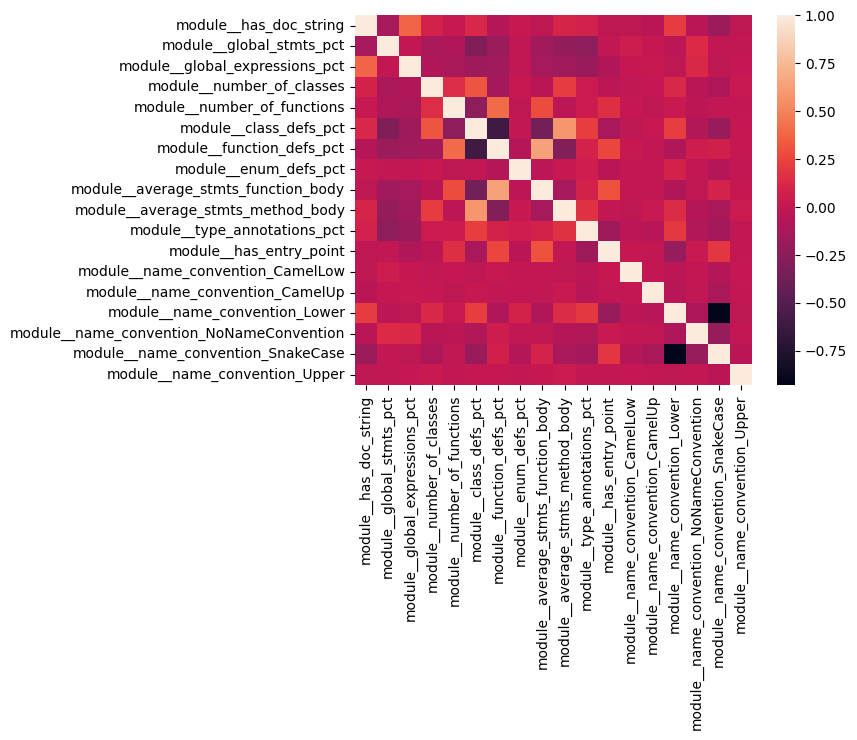

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 13 variable (2 booleanas, 6 porcentuales, 4 numericas y una categorica) se hara un analisis detallado

### Variable has_doc_string (1/13)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo.

<Axes: xlabel='module__has_doc_string', ylabel='Count'>

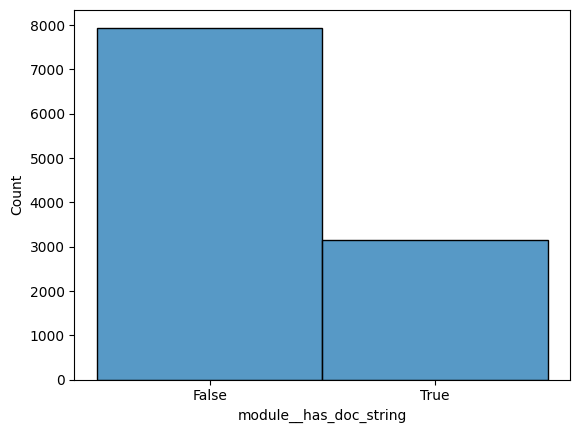

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

In [12]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 3156 valores verdaderos y 7946 valores falsos. Y, la desviación típica es de 0.4510878026485443
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.2842731039452351.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.7157268960547649.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

La variable module__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_doc_string toma el valor de 0.0 en un 71.57% de los items.
La variable module__has_doc_string toma el valor de 1.0 en un 28.43% de los items.


In [14]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,3156.0,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3156.0
mean,1.0,0.120110,0.181438,1.486375,2.367554,0.478904,0.349508,0.007773,2.388389,2.510170,0.227646,0.163815,0.000951,0.000951,0.474651,0.011724,0.511724,0.0
std,0.0,0.159780,0.222233,4.461436,7.162892,0.455432,0.431911,0.065325,3.970588,2.747744,0.281292,0.370166,0.030822,0.030822,0.499436,0.107657,0.499942,0.0
min,1.0,0.000000,0.002703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.0,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.0,0.076923,0.100000,1.000000,0.000000,0.444444,0.000000,0.000000,0.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,1.0,0.166667,0.200000,1.000000,2.000000,1.000000,0.875000,0.000000,4.000000,4.333333,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0
max,1.0,0.987805,1.000000,113.000000,172.000000,1.000000,1.000000,1.000000,42.000000,24.799999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Variable has_entry_point (2/13)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". 

<Axes: xlabel='module__has_entry_point', ylabel='Count'>

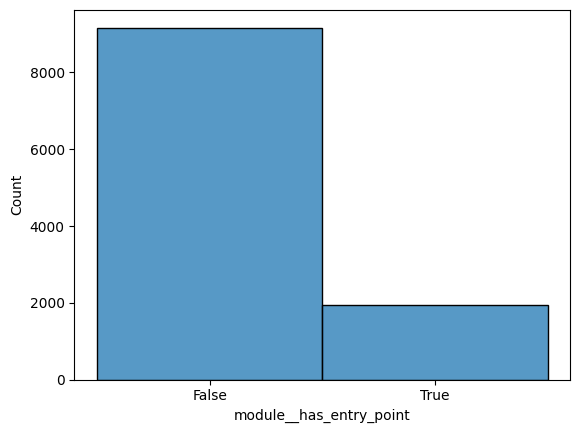

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

La variable has_entry_point contiene 1934 valores verdaderos y 9168 valores falsos. Y, la desviación típica es de 0.37930089235305786
La frecuencia con la que programa puede tener la variable has_entry_point a True es 0.17420284633399388.
La frecuencia con la que programa puede tener la variable has_entry_point a False es 0.8257971536660061.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

La variable module__has_entry_point contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_entry_point toma el valor de 0.0 en un 82.58% de los items.
La variable module__has_entry_point toma el valor de 1.0 en un 17.42% de los items.


In [18]:
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.0,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000,1934.000000
mean,0.267322,0.161349,0.046256,0.916753,4.213547,0.272539,0.657208,0.000966,5.197728,1.985620,0.094478,1.0,0.004137,0.006722,0.114788,0.028438,0.845398,0.000517
std,0.442676,0.121993,0.096595,2.326170,6.579169,0.397580,0.429638,0.018660,5.594219,4.284204,0.208894,0.0,0.064199,0.081732,0.318848,0.166265,0.361618,0.022739
min,0.000000,0.008547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.125000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.200000,0.062500,1.000000,5.000000,0.500000,1.000000,0.000000,7.442708,3.000000,0.020957,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.886792,64.000000,69.000000,1.000000,1.000000,0.500000,53.000000,114.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_classes (3/13)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 113. Con una media de 1.09.

<Axes: ylabel='module__number_of_classes'>

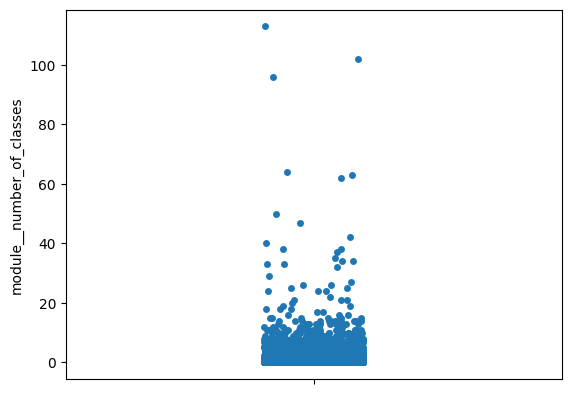

In [19]:
sns.stripplot(X['module__number_of_classes'])

### IMPORTANTE
Los tres valores máximos están muy alejados del siguiente.

In [20]:
print_outliers_for_df_column(X, 'module__number_of_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9680780047937796
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.050650412273298195,73.08003704791861]
-3.0IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -3.0 (Q1-3*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -1.5 (Q1-1.5*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 1085 instancias tienen un valor para module__number_of_classes superior a 2.5 (Q3+1.5*IQR) para module__number_of_classes. Representando un 9.773% del total de instancias.
+3.0IQR: 468 instancias tienen un valor para module__number_of_classes superior a 4.0 (Q3-3*IQR) para module__number_of_classes. Representando un 4.215% del total de instancias.
L: 0 instancias tien

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 73.08 (Con un MC de 96 usamos U)

In [21]:
X[X['module__number_of_classes'] > 73.08].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0
mean,1.0,0.020280,0.144219,103.666664,3.000000,0.971435,0.028565,0.0,3.041667,2.380625,0.129630,0.0,0.0,0.0,0.666667,0.0,0.333333,0.0
std,0.0,0.018173,0.235638,8.621678,4.358899,0.042108,0.042108,0.0,4.430599,0.982732,0.224525,0.0,0.0,0.0,0.577350,0.0,0.577350,0.0
min,1.0,0.000000,0.007576,96.000000,0.000000,0.923077,0.000000,0.0,0.000000,1.793388,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,1.0,0.012876,0.008174,99.000000,0.500000,0.957152,0.004386,0.0,0.500000,1.813361,0.000000,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0
50%,1.0,0.025751,0.008772,102.000000,1.000000,0.991228,0.008772,0.0,1.000000,1.833333,0.000000,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
75%,1.0,0.030419,0.212540,107.500000,4.500000,0.995614,0.042848,0.0,4.562500,2.674242,0.194444,0.0,0.0,0.0,1.000000,0.0,0.500000,0.0
max,1.0,0.035088,0.416309,113.000000,8.000000,1.000000,0.076923,0.0,8.125000,3.515152,0.388889,0.0,0.0,0.0,1.000000,0.0,1.000000,0.0


### IMPORTANTE

Hay tres modulos que tienen un número de clases muy superior al resto.

### Variable number_of_functions (4/13)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 258. Con una media de 2.23.

<Axes: ylabel='module__number_of_functions'>

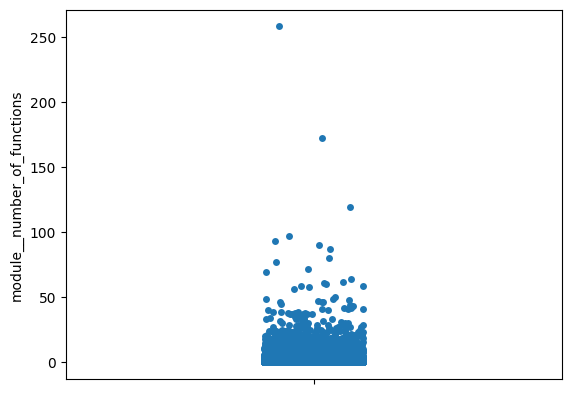

In [22]:
sns.stripplot(X['module__number_of_functions'])

### IMPORTANTE
Los dos valores máximos están muy alejados del siguiente.

In [23]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9629406635543911
Rango valores atípicos extremos (Tukey): [-6.0,8.0]
Rango valores atípicos leves (Tukey): [-3.0,5.0]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.10313875784986977,143.22790639441607]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -6.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -3.0 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 1277 instancias tienen un valor para module__number_of_functions superior a 5.0 (Q3+1.5*IQR) para module__number_of_functions. Representando un 11.5% del total de instancias.
+3.0IQR: 744 instancias tienen un valor para module__number_of_functions superior a 8.0 (Q3-3*IQR) para module__number_of_functions. Representando un 6.701% del total de instancias.
L: 0 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 143 (Con un MC de 96 usamos U)

In [24]:
X[X['module__number_of_functions'] > 143].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,0.500000,0.315730,0.002475,32.500000,215.000000,0.105446,0.894554,0.0,4.673450,2.032258,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,0.707107,0.446510,0.000322,41.719299,60.811184,0.124880,0.124880,0.0,0.237073,0.045620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.002247,3.000000,172.000000,0.017143,0.806250,0.0,4.505814,2.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,0.250000,0.157865,0.002361,17.750000,193.500000,0.061295,0.850402,0.0,4.589632,2.016129,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,0.500000,0.315730,0.002475,32.500000,215.000000,0.105446,0.894554,0.0,4.673450,2.032258,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,0.750000,0.473595,0.002589,47.250000,236.500000,0.149598,0.938705,0.0,4.757268,2.048387,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,1.000000,0.631461,0.002703,62.000000,258.000000,0.193750,0.982857,0.0,4.841085,2.064516,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### IMPORTANTE

Hay dos modulos que tienen un número de funciones muy superior al resto.

### Variable average_stmts_function_body (5/13)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 53. Con una media de 2.52.

<Axes: ylabel='module__average_stmts_function_body'>

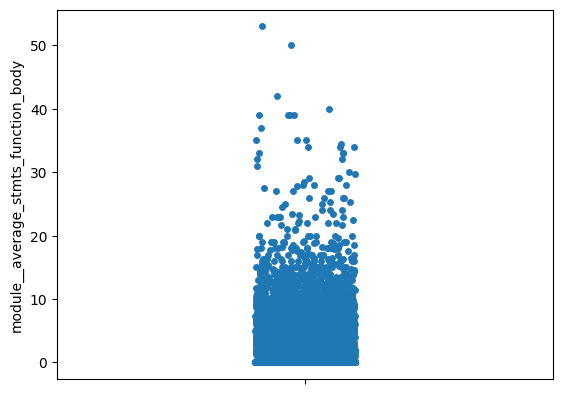

In [25]:
sns.stripplot(X['module__average_stmts_function_body'])

### IMPORTANTE
Los dos valores máximos están muy alejados del siguiente.

In [26]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4610479071240082
Rango valores atípicos extremos (Tukey): [-12.0,16.0]
Rango valores atípicos leves (Tukey): [-6.0,10.0]
Rango valores atípicos extremos (Fixed BoxPlot): [-1.194935004415716,41.93791841136688]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -12.0 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -6.0 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 529 instancias tienen un valor para module__average_stmts_function_body superior a 10.0 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 4.765% del total de instancias.
+3.0IQR: 150 instancias tienen un valor para module__average_stmts_function_body superior a 16.0 (Q3-3*IQR) para module__average_stmts_fu

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 41.9 (Con un MC de 46 usamos U)

In [27]:
X[X['module__average_stmts_function_body'] > 41.9].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.000000,3.0,3.0,3.000000,3.0,3.000000,3.0
mean,0.333333,0.152778,0.020833,0.0,1.0,0.0,1.0,0.0,48.333332,0.0,0.0,0.333333,0.0,0.0,0.666667,0.0,0.333333,0.0
std,0.577350,0.168394,0.036084,0.0,0.0,0.0,0.0,0.0,5.686241,0.0,0.0,0.577350,0.0,0.0,0.577350,0.0,0.577350,0.0
min,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,42.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.062500,0.000000,0.0,1.0,0.0,1.0,0.0,46.000000,0.0,0.0,0.000000,0.0,0.0,0.500000,0.0,0.000000,0.0
50%,0.000000,0.125000,0.000000,0.0,1.0,0.0,1.0,0.0,50.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
75%,0.500000,0.229167,0.031250,0.0,1.0,0.0,1.0,0.0,51.500000,0.0,0.0,0.500000,0.0,0.0,1.000000,0.0,0.500000,0.0
max,1.000000,0.333333,0.062500,0.0,1.0,0.0,1.0,0.0,53.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0


### IMPORTANTE
Hay tres modulos que tienen un número de sentencias en el cuerpo de las funciones superior al resto.

### Variable average_stmts_method_body (6/13)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 114. Con una media de 2.02.

<Axes: ylabel='module__average_stmts_method_body'>

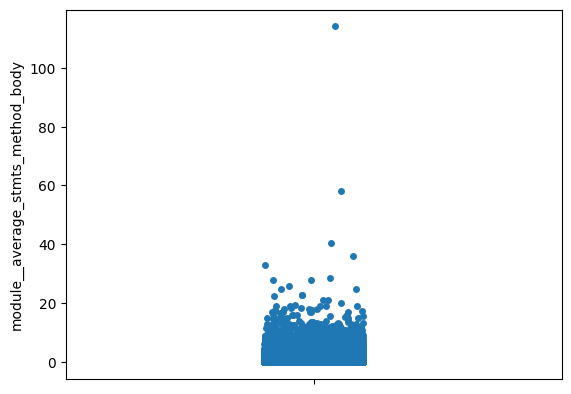

In [28]:
sns.stripplot(X['module__average_stmts_method_body'])

### IMPORTANTE
Los dos valores máximos están muy alejados del siguiente.

In [29]:
print_outliers_for_df_column(X, 'module__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5964910837698971
Rango valores atípicos extremos (Tukey): [-10.241379261016846,13.655172348022461]
Rango valores atípicos leves (Tukey): [-5.120689630508423,8.534482717514038]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.6348099160184482,59.07333124570723]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -10.241379261016846 (Q1-3*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -5.120689630508423 (Q1-1.5*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 309 instancias tienen un valor para module__average_stmts_method_body superior a 8.534482717514038 (Q3+1.5*IQR) para module__average_stmts_method_body. Representando un 2.783% del total de instancias.
+3.0IQR: 66 instancias tienen un valor para module__

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 59.0 (Con un MC de 59 usamos U)

In [30]:
X[X['module__average_stmts_method_body'] > 59.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,1.0,1.000000,1.0,1.0,1.0,1.00,1.00,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.444444,0.0,1.0,3.0,0.25,0.75,0.0,5.666667,114.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.444444,0.0,1.0,3.0,0.25,0.75,0.0,5.666667,114.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,0.0,0.444444,0.0,1.0,3.0,0.25,0.75,0.0,5.666667,114.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,0.0,0.444444,0.0,1.0,3.0,0.25,0.75,0.0,5.666667,114.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,0.0,0.444444,0.0,1.0,3.0,0.25,0.75,0.0,5.666667,114.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
max,0.0,0.444444,0.0,1.0,3.0,0.25,0.75,0.0,5.666667,114.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### IMPORTANTE
Hay un modulo que tiene un número de sentencias en el cuerpo de los métodos superior al resto.

### Variable name_convention (7/13)
Esta variable es de tipo categórica y representa la name_convention del nombre del fichero.

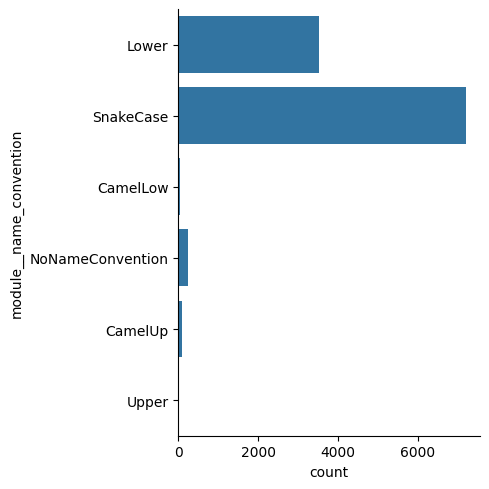

In [31]:
sns.catplot(full_table['module__name_convention'], kind="count")

In [32]:
print_frequency_anal_for_cat_var(full_table, 'module__name_convention')

La variable module__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable module__name_convention toma el valor de SnakeCase en un 64.89% de los items.
La variable module__name_convention toma el valor de Lower en un 31.82% de los items.
La variable module__name_convention toma el valor de NoNameConvention en un 2.162% de los items.
La variable module__name_convention toma el valor de CamelUp en un 0.7116% de los items.
La variable module__name_convention toma el valor de CamelLow en un 0.2972% de los items.
La variable module__name_convention toma el valor de Upper en un 0.1171% de los items.


### Variable global_stmts_pct (8/13)
Esta variable representa la proporción de los nodos en el global scope que son sentencias. Toma los valores de 0.0 - 1.0. La media es 0.16.

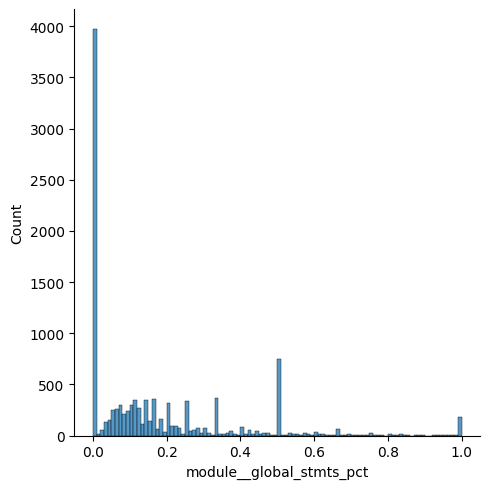

In [33]:
sns.displot(X['module__global_stmts_pct'], bins=[i / 100 for i in range(0, 101)])

In [34]:
print_outliers_for_df_column(X, 'module__global_stmts_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5305707592937814
Rango valores atípicos extremos (Tukey): [-0.75,1.0]
Rango valores atípicos leves (Tukey): [-0.375,0.625]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.058552768215667114,3.3813173173141835]
-3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.75 (Q1-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.375 (Q1-1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 430 instancias tienen un valor para module__global_stmts_pct superior a 0.625 (Q3+1.5*IQR) para module__global_stmts_pct. Representando un 3.873% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 1.0 (Q3-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.625 (Con un MC de 53 usamos Tuckey)

In [35]:
X[X['module__global_stmts_pct'] > 0.625].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0
mean,0.148837,0.857380,0.044504,0.302326,0.848837,0.065275,0.106818,0.002326,0.462034,0.344181,0.018611,0.037209,0.013953,0.011628,0.406977,0.093023,0.474419,0.0
std,0.356343,0.141572,0.082907,3.048442,12.456654,0.223344,0.290441,0.048224,1.697010,1.474103,0.102012,0.189495,0.117434,0.107329,0.491843,0.290803,0.499927,0.0
min,0.000000,0.629630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.705882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.883037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.051974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,0.333333,62.000000,258.000000,1.000000,1.000000,1.000000,17.000000,17.666666,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE
El 64% de los modulos no tiene sentencias en el global scope.

### Variable global_expressions_pct (9/13)
Esta variable representa la proporción de los nodos en el global scope son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.08.

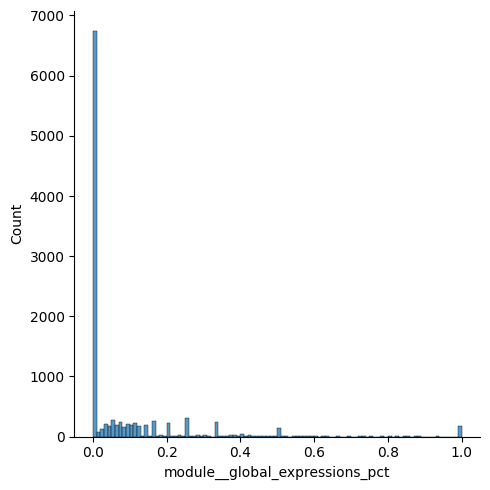

In [36]:
sns.displot(X['module__global_expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [37]:
print_outliers_for_df_column(X, 'module__global_expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.828042708337307
Rango valores atípicos extremos (Tukey): [-0.27272728085517883,0.3636363744735718]
Rango valores atípicos leves (Tukey): [-0.13636364042758942,0.22727273404598236]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0075170642158881,3.8333599217941665]
-3.0IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.27272728085517883 (Q1-3*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.13636364042758942 (Q1-1.5*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1325 instancias tienen un valor para module__global_expressions_pct superior a 0.22727273404598236 (Q3+1.5*IQR) para module__global_expressions_pct. Representando un 11.93% del total de instancias.
+3.0IQR: 617 instancias tienen un valor para module__global

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.36 (Con un MC de 82 usamos Tuckey Extremo)

In [38]:
X[X['module__global_expressions_pct'] > 0.37].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.472313,0.168986,0.647540,0.252443,0.488599,0.055416,0.207613,0.000814,0.982070,0.161835,0.011335,0.063518,0.004886,0.017915,0.166124,0.084691,0.724756,0.001629
std,0.499640,0.189049,0.241169,3.892493,1.604144,0.217616,0.400140,0.020178,2.851551,0.751256,0.083317,0.244091,0.069786,0.132752,0.372495,0.278648,0.447001,0.040357
min,0.000000,0.000000,0.370370,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.111111,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.307692,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,0.625000,1.000000,96.000000,27.000000,1.000000,1.000000,0.500000,28.500000,6.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE

 El 60% de los modulos no tiene expresiones en el global scope.


### Variable class_defs_pct (10/13)
Esta variable representa la proporción de definiciones que son definiciones de clases. Esta variable toma valores de 0.0 - 1.0. Su media es 0.39. 

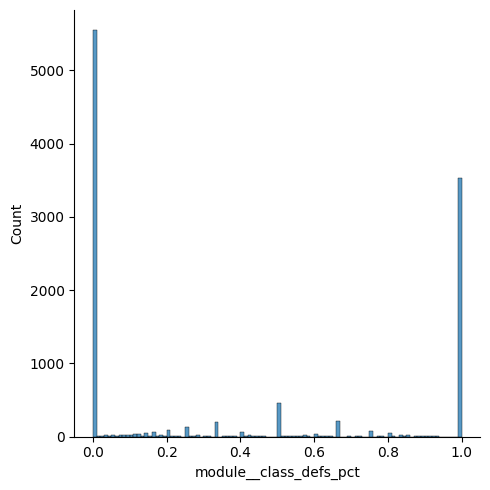

In [39]:
sns.displot(X['module__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [40]:
print_outliers_for_df_column(X, 'module__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.16723397233210607
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.8353923409750097,3.928238352817256]
-3.0IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -3.0 (Q1-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 4.0 (Q3-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para module__class_def

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [41]:
X[(X['module__class_defs_pct'] > 0.0) & (X['module__class_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,0.333991,0.118283,0.031750,2.847558,5.519980,0.421957,0.555992,0.022050,4.641928,3.976147,0.268079,0.215096,0.001973,0.002960,0.388752,0.006413,0.598421,0.001480
std,0.471753,0.127906,0.063328,5.002068,11.093828,0.223361,0.247349,0.089782,3.601425,3.678662,0.254276,0.410990,0.044390,0.054339,0.487587,0.079846,0.490339,0.038452
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028992,0.000000,1.000000,1.000000,0.250000,0.363636,0.000000,2.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.083333,0.000000,2.000000,2.000000,0.450000,0.500000,0.000000,4.000000,3.400000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.166667,0.047619,3.000000,6.000000,0.575188,0.750000,0.000000,6.000000,5.145503,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,0.898649,0.886792,113.000000,258.000000,0.991228,0.985714,0.750000,34.500000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE

 El 50% de los modulos no tiene clases definidas.

### Variable function_defs_pct (11/13)
Esta variable representa la proporción de deficiones que son definiciones de funciones. Esta variable toma valores de 0.0 - 1.0. Su media es 0.40

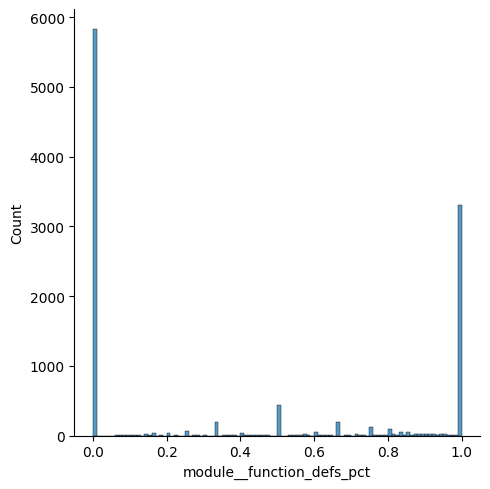

In [42]:
sns.displot(X['module__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [43]:
print_outliers_for_df_column(X, 'module__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.14527827501296997
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.9021189856902195,3.6820413656110915]
-3.0IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -3.0 (Q1-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 4.0 (Q3-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un val

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [44]:
X[(X['module__function_defs_pct'] > 0.0) & (X['module__function_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.00000,1967.000000,1967.000000,1967.000000,1967.000000
mean,0.332994,0.118748,0.031568,2.818505,5.743264,0.409830,0.580315,0.009855,4.832208,3.960241,0.262249,0.223691,0.002034,0.00305,0.377733,0.006609,0.609049,0.001525
std,0.471404,0.128340,0.062019,5.059273,11.211990,0.225285,0.224667,0.054221,3.539484,3.736686,0.253897,0.416823,0.045061,0.05516,0.484944,0.081048,0.488087,0.039033
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.008772,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029412,0.000000,1.000000,1.000000,0.222222,0.428571,0.000000,2.500000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.083333,0.000000,2.000000,3.000000,0.400000,0.562500,0.000000,4.000000,3.375000,0.205882,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.166667,0.047619,3.000000,6.000000,0.541958,0.757049,0.000000,6.000000,5.166667,0.500000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000
max,1.000000,0.898649,0.886792,113.000000,258.000000,0.991228,0.985714,0.500000,34.500000,114.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE

 Casi el 50% de los modulos no tienen definiciones de funciones

### Variable enum_defs_pct (12/13)
Esta variable representa la proporción de las definiciones que son clases con la notación enum. Esta variable toma valores de 0.0 - 0.0. Su media es 0.05.

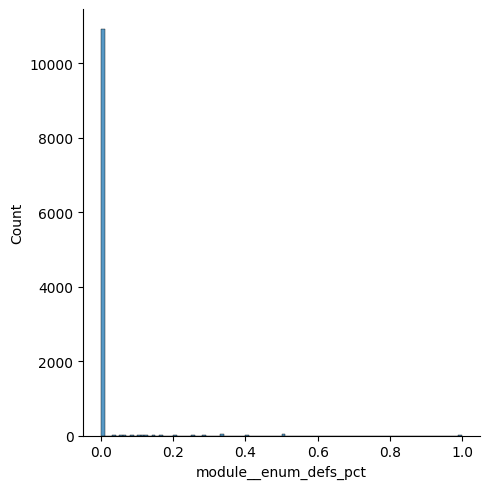

In [45]:
sns.displot(X['module__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [46]:
print_outliers_for_df_column(X, 'module__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9437356527782944
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 189 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__enum_defs_pct. Representando un 1.702% del total de instancias.
+3.0IQR: 189 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3-3*IQR) para module__enum_defs_pct. Representando un 1.702% del total de instancias.
L: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 para module__en

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [47]:
X[X['module__enum_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.0,189.000000,189.0,189.000000,189.0
mean,0.343915,0.144781,0.035442,2.608466,3.285714,0.396824,0.242264,0.360912,1.997986,2.949368,0.367436,0.042328,0.0,0.0,0.661376,0.0,0.338624,0.0
std,0.476275,0.130338,0.081328,3.336633,8.320243,0.282182,0.308794,0.261220,2.852680,2.188952,0.248884,0.201871,0.0,0.0,0.474499,0.0,0.474499,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.045455,0.000000,1.000000,0.000000,0.116279,0.000000,0.166667,0.000000,1.642857,0.125000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
50%,0.000000,0.125000,0.000000,2.000000,0.000000,0.500000,0.000000,0.333333,0.000000,3.000000,0.425926,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0
75%,1.000000,0.217391,0.045455,3.000000,3.000000,0.666667,0.500000,0.500000,3.500000,4.289474,0.574468,0.000000,0.0,0.0,1.000000,0.0,1.000000,0.0
max,1.000000,0.883721,0.724638,26.000000,59.000000,0.875000,0.950820,1.000000,16.000000,14.883721,0.870968,1.000000,0.0,0.0,1.000000,0.0,1.000000,0.0


### IMPORTANTE
Apenas un 2% de los modulos tienen definiciones de enums.

### Variable type_annotations_pct (13/13)
Esta variable representa la proporción de los parámetros y returns de funciones y métodos que tienen una anotación de tipo. Toma valores entre 0.0 - 0.90. Su media es 0.19.

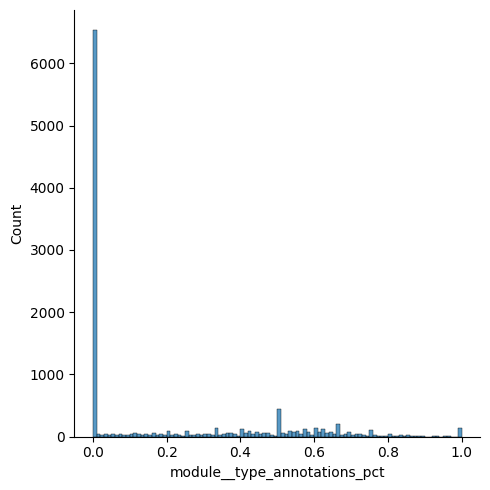

In [48]:
sns.displot(X['module__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [49]:
print_outliers_for_df_column(X, 'module__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5314487516880035
Rango valores atípicos extremos (Tukey): [-1.297297328710556,1.7297297716140747]
Rango valores atípicos leves (Tukey): [-0.648648664355278,1.0810811072587967]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.10096971193057794,5.867820668475379]
-3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -1.297297328710556 (Q1-3*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -0.648648664355278 (Q1-1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct superior a 1.0810811072587967 (Q3+1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct superior a 1.

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [50]:
X[X['module__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.000000,4587.0,4587.0,4587.000000,4587.000000,4587.000000,4587.000000
mean,0.318945,0.095960,0.035047,1.540222,2.993242,0.569283,0.420525,0.010192,2.866785,2.956505,0.471585,0.106824,0.0,0.0,0.429039,0.004142,0.565511,0.001308
std,0.466118,0.117926,0.065002,2.747053,6.573726,0.431067,0.432550,0.065754,3.843601,2.818103,0.225405,0.308923,0.0,0.0,0.494993,0.064233,0.495744,0.036147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002128,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.323529,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.066667,0.000000,1.000000,1.000000,0.666667,0.333333,0.000000,2.000000,2.750000,0.500000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.142857,0.055556,2.000000,3.000000,1.000000,1.000000,0.000000,4.666667,4.375000,0.625000,0.000000,0.0,0.0,1.000000,0.000000,1.000000,0.000000
max,1.000000,0.879310,0.937500,96.000000,119.000000,1.000000,1.000000,1.000000,40.000000,58.086956,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 40% de los modulos tienen anotaciones de tipo.

## Multivariate

TODO: isolation forest algorithm

In [51]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
7396,NoNameConvention,True,0.583333,0.250000,4,0,1.000000,0.000000,0.0,0.000000,4.380952,0.000000,False,EXPERT
7539,NoNameConvention,True,0.250000,0.500000,0,1,0.000000,1.000000,0.0,6.000000,0.000000,1.000000,False,EXPERT
7562,NoNameConvention,True,0.166667,0.166667,0,3,0.000000,1.000000,0.0,2.666667,0.000000,0.800000,True,EXPERT
7588,NoNameConvention,True,0.333333,0.333333,0,1,0.000000,1.000000,0.0,8.000000,0.000000,0.500000,True,EXPERT
7824,NoNameConvention,True,0.166667,0.166667,1,1,0.500000,0.500000,0.0,14.000000,5.333334,0.500000,True,EXPERT
8666,Lower,True,0.317073,0.006098,64,39,0.621359,0.378641,0.0,4.769231,3.430657,0.000000,True,EXPERT
9298,Lower,True,0.025641,0.008547,19,77,0.197917,0.802083,0.0,1.662338,5.900000,0.226695,False,EXPERT
9358,Lower,True,0.148649,0.635135,0,2,0.000000,1.000000,0.0,26.000000,0.000000,0.000000,True,EXPERT
9361,Lower,True,0.105820,0.751323,0,4,0.000000,1.000000,0.0,28.500000,0.000000,0.000000,True,EXPERT
10571,SnakeCase,True,0.025751,0.416309,96,8,0.923077,0.076923,0.0,8.125000,1.793389,0.388889,False,EXPERT


### IMPORTANTE
Analizar los 14 resultados obtenidos.